# 📚 Imports
---

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 📖 Data
---

- **work_year:** O ano em que o salário foi pago.

- **experience_level:** O nível de experiência no trabalho durante o ano

- **employment_type:** o tipo de emprego para a função

- **job_title:** A função em que trabalhou durante o ano.

- **salário:** O valor bruto total do salário pago.

- **salario_moeda:** A moeda do salário pago como um código de moeda ISO 4217.

- **salarioinusd:** O salário em USD

- **employee_residence:** o país de residência principal do funcionário durante o ano de trabalho como um código de país ISO 3166.

- **remote_ratio:** A quantidade total de trabalho feito remotamente

- **company_location:** O país da sede do empregador ou filial contratante

- **company_size:** O número médio de pessoas que trabalharam para a empresa durante o ano

In [8]:
df = pd.read_csv('data/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


### Consigo ver que existem ouliers apenas com o .describe()

Text(0.5, 0, 'Salary')

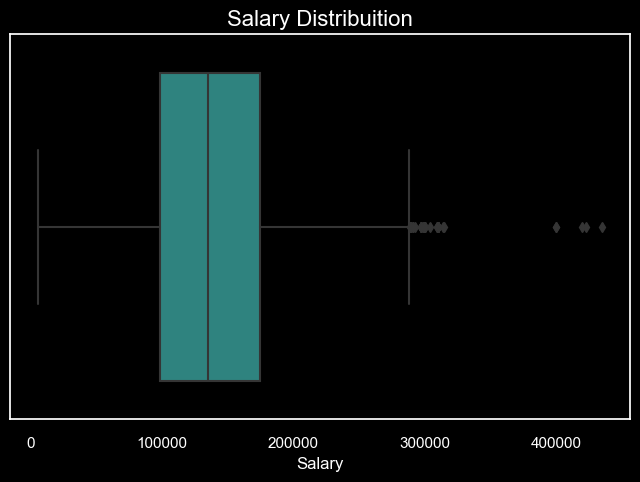

In [149]:
# Set background color and size
plt.figure(figsize = (8, 5))
plt.style.use('dark_background')

# Create the boxplot
sns.boxplot(x = df['salary'], palette = 'viridis')

# Add a title and axis labels
plt.title('Salary Distribuition', color = 'white', fontsize = 16)
plt.xlabel('Salary', color = 'white')

Text(0.5, 0, 'Salary')

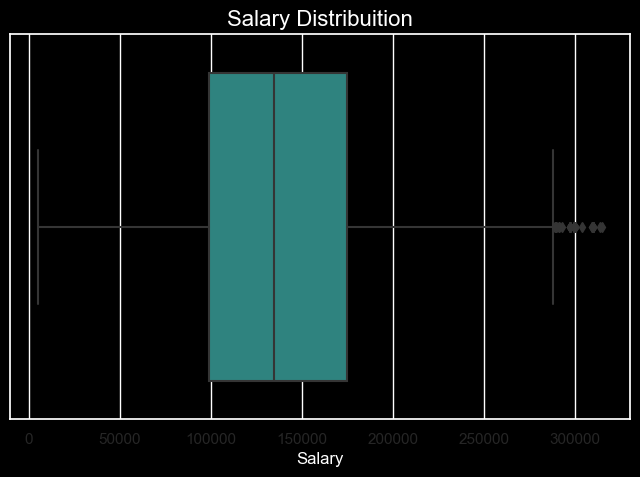

In [63]:
# Set background color and size
plt.figure(figsize = (8, 5))
plt.style.use('dark_background')

# Create the boxplot
sns.boxplot(x = df['salary_in_usd'], palette = 'viridis')

# Add a title and axis labels
plt.title('Salary Distribuition', color = 'white', fontsize = 16)
plt.xlabel('Salary', color = 'white')

---
### Removendo outliers com zscore

Z = (x - μ) / σ

where:

- x is the data point value
- μ is the average of the values of the variable
- σ is the standard deviation of the variable values
---

In [21]:
df = df[(np.abs(stats.zscore(df['salary'])) < 5)]
df = df[(np.abs(stats.zscore(df['salary_in_usd'])) < 3)]

Text(0.5, 0, 'Salary')

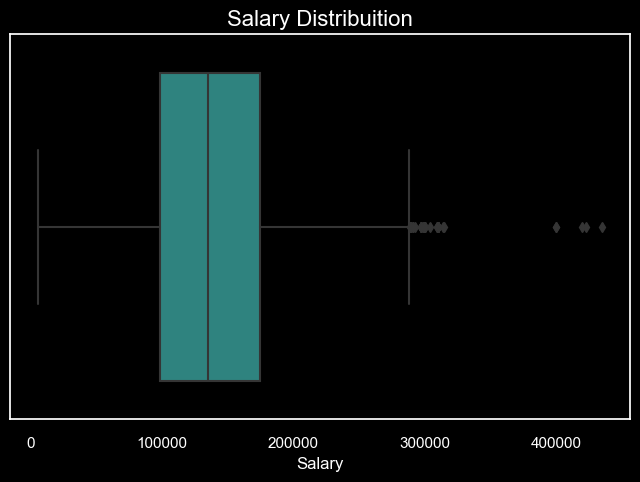

In [148]:
# Set background color and size
plt.figure(figsize = (8, 5))
plt.style.use('dark_background')

# Create the box plot
sns.boxplot(x = df['salary'], palette = 'viridis')

# Add a title and axis labels
plt.title('Salary Distribuition', color = 'white', fontsize = 16)
plt.xlabel('Salary', color = 'white')

### Now the data is ready to do the visualization

# 📉 Visualization
---

### Salary Distribution in USD

Text(0, 0.5, 'Density')

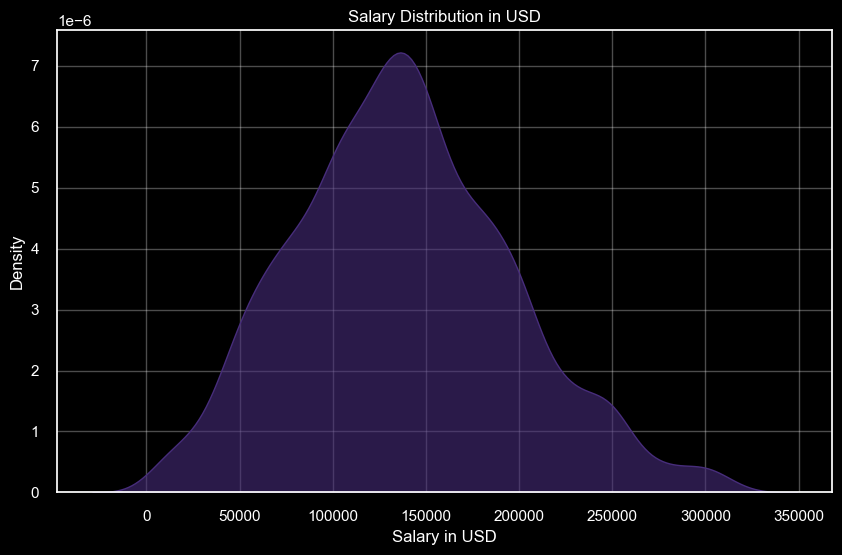

In [154]:
# Set background color and size
plt.figure(figsize = (10, 6))
plt.style.use('dark_background')

# Create a density plot of salary in USD
sns.kdeplot(df['salary_in_usd'], shade = True, color # Set background color and size
plt.figure(figsize = (8, 5))
plt.style.use('dark_background')= '#472d7b', alpha = 0.6)

plt.grid(alpha = 0.3)
# Add a title and axis labels
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Density')


### Distribution of Work Years

Text(0.5, 1.0, 'Distribution of Work Years')

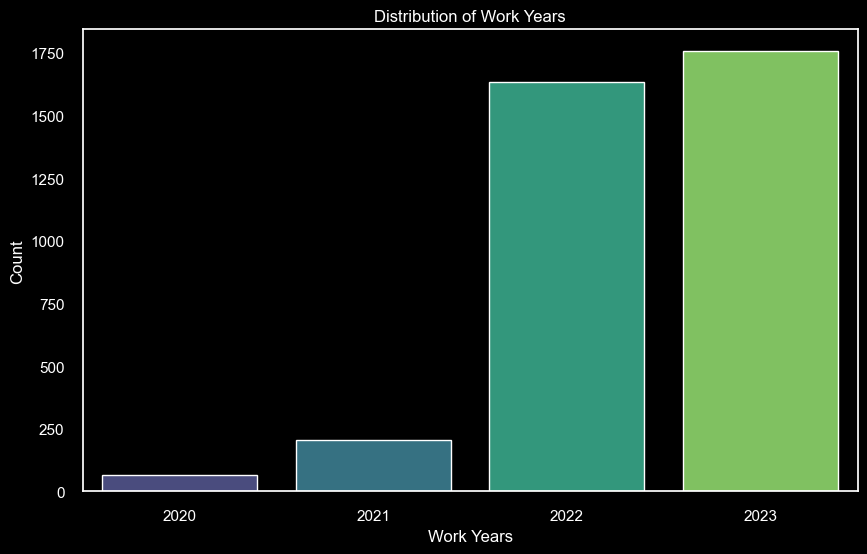

In [143]:
# Set background color and size
plt.figure(figsize = (10,6))
plt.style.use('dark_background')

# Create the bar chart
sns.countplot(data = df, x = 'work_year', palette = 'viridis')

# Add a title and axis labels
plt.xlabel('Work Years')
plt.ylabel('Count')
plt.title('Distribution of Work Years')

### Distribution of Experience Levels

Text(0.5, 1.0, 'Distribution of Experience Levels')

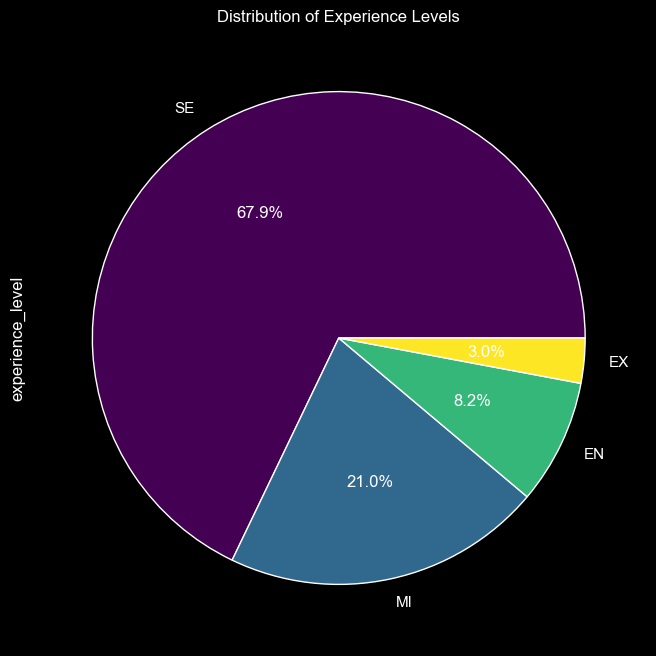

In [158]:
# Set background color and size
plt.figure(figsize = (10, 8))
plt.style.use('dark_background')

# Create the pie chart
df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='viridis')
# Add a title 
plt.title('Distribution of Experience Levels')

### Distribution of Employment Types

Text(0.5, 1.0, 'Distribution of Employment Types')

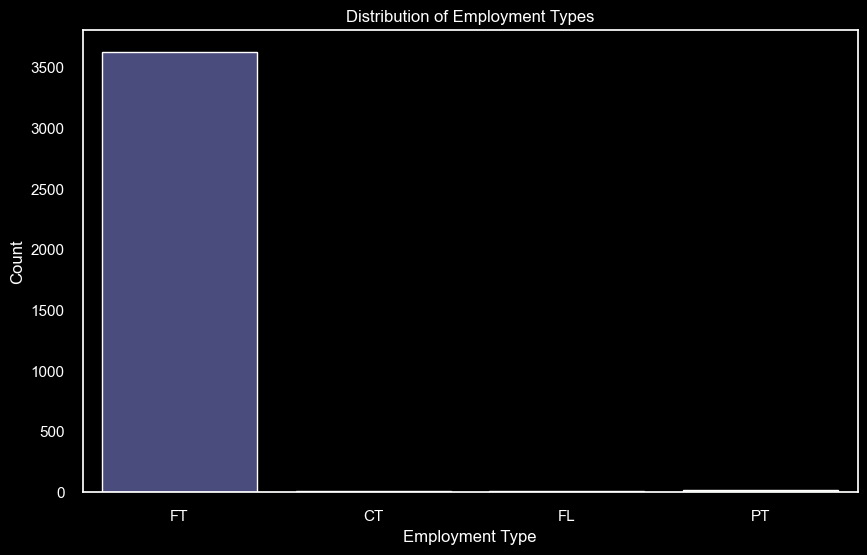

In [145]:
# Set background color and size
plt.figure(figsize = (10,6))
plt.style.use('dark_background')

# Create the bar chart
sns.countplot(data = df, x = 'employment_type', palette = 'viridis')

# Add a title and axis labels
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Distribution of Employment Types')

### Top 10 Job Titles

Text(0.5, 1.0, 'Top 10 Job Titles')

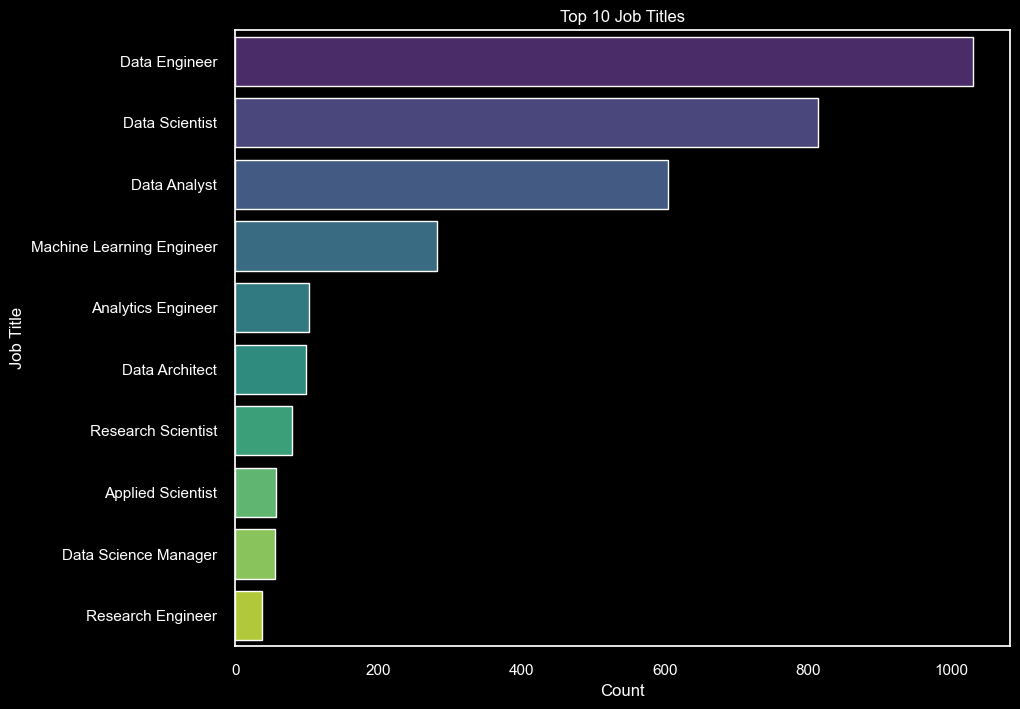

In [147]:
# Set background color and size
plt.figure(figsize = (10, 8))
plt.style.use('dark_background')

top_jobs = df['job_title'].value_counts().nlargest(10)

# Create the bar chart
sns.barplot(x = top_jobs, y = top_jobs.index, palette = 'viridis')

# Add a title and axis labels
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')

### Distribution of Salaries

Text(0.5, 1.0, 'Distribution of Salaries')

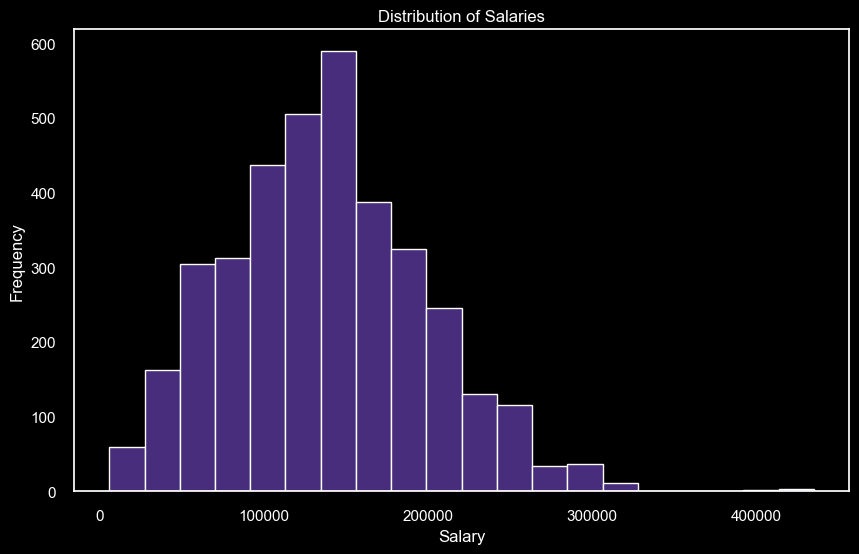

In [160]:
# Set background color and size
plt.figure(figsize = (10, 6))
plt.style.use('dark_background')

# Create the histogram
plt.hist(df['salary'], bins = 20, color = '#472d7b')

# Add a title and axis labels
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')

### Distribution of Salaries in USD

Text(0.5, 1.0, 'Distribution of Salaries in USD')

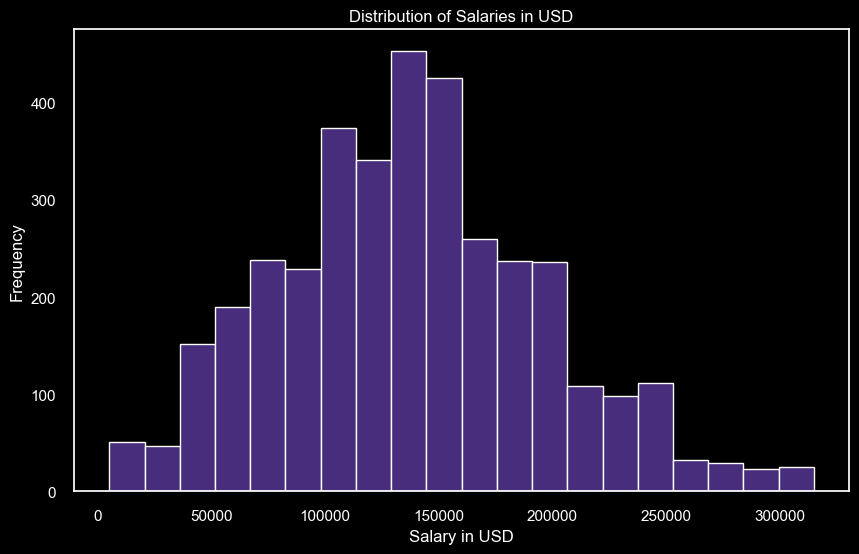

In [159]:
# Set background color and size
plt.figure(figsize = (10, 6))
plt.style.use('dark_background')

# Create the histogram
plt.hist(df['salary_in_usd'], bins = 20, color = '#472d7b')

# Add a title and axis labels
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries in USD')

### Distribution of Remote Ratio

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution')

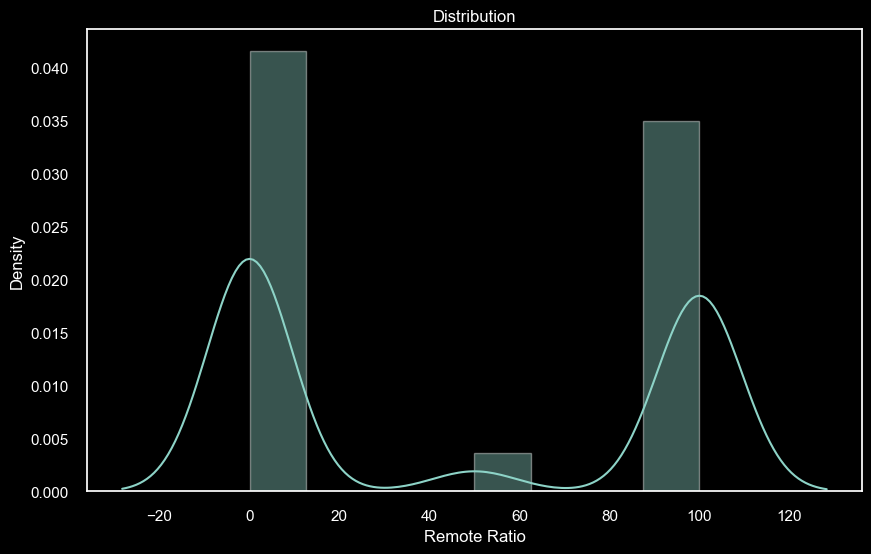

In [197]:
# Set background color and size
plt.figure(figsize = (10,6))
plt.style.use('dark_background')

# Create distribution plot
sns.distplot(df['remote_ratio'], kde = True)

# Add a title and axis labels
plt.xlabel('Remote Ratio')
plt.ylabel('Density')
plt.title('Distribution of Remote Ratio')

### Distribution of Company Size

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution')

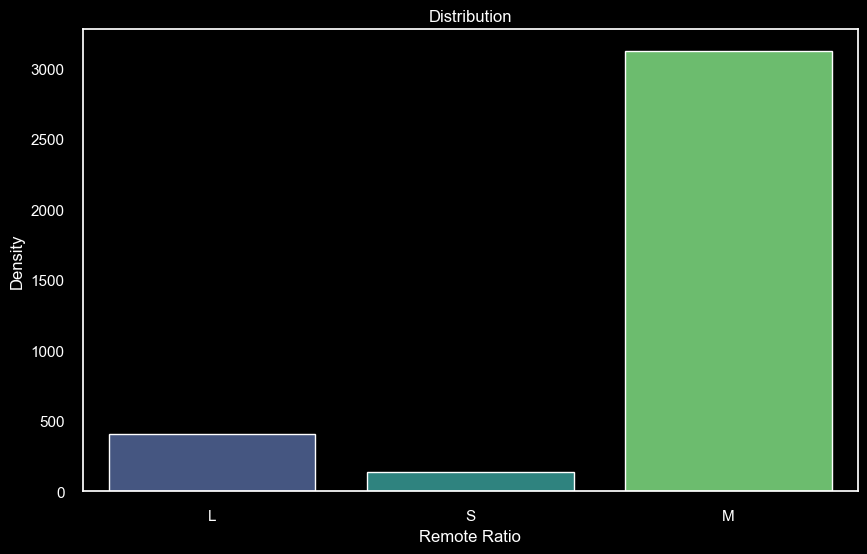

In [202]:
# Set background color and size
plt.figure(figsize = (10,6))
plt.style.use('dark_background')

# Create count plot
sns.countplot(df['company_size'], palette = 'viridis')

# Add a title and axis labels
plt.xlabel('Company Size')
plt.ylabel('Density')
plt.title('Distribution of Company Size')

# 📊 Distribuition of Values with all columns
---

<Figure size 1500x2800 with 0 Axes>

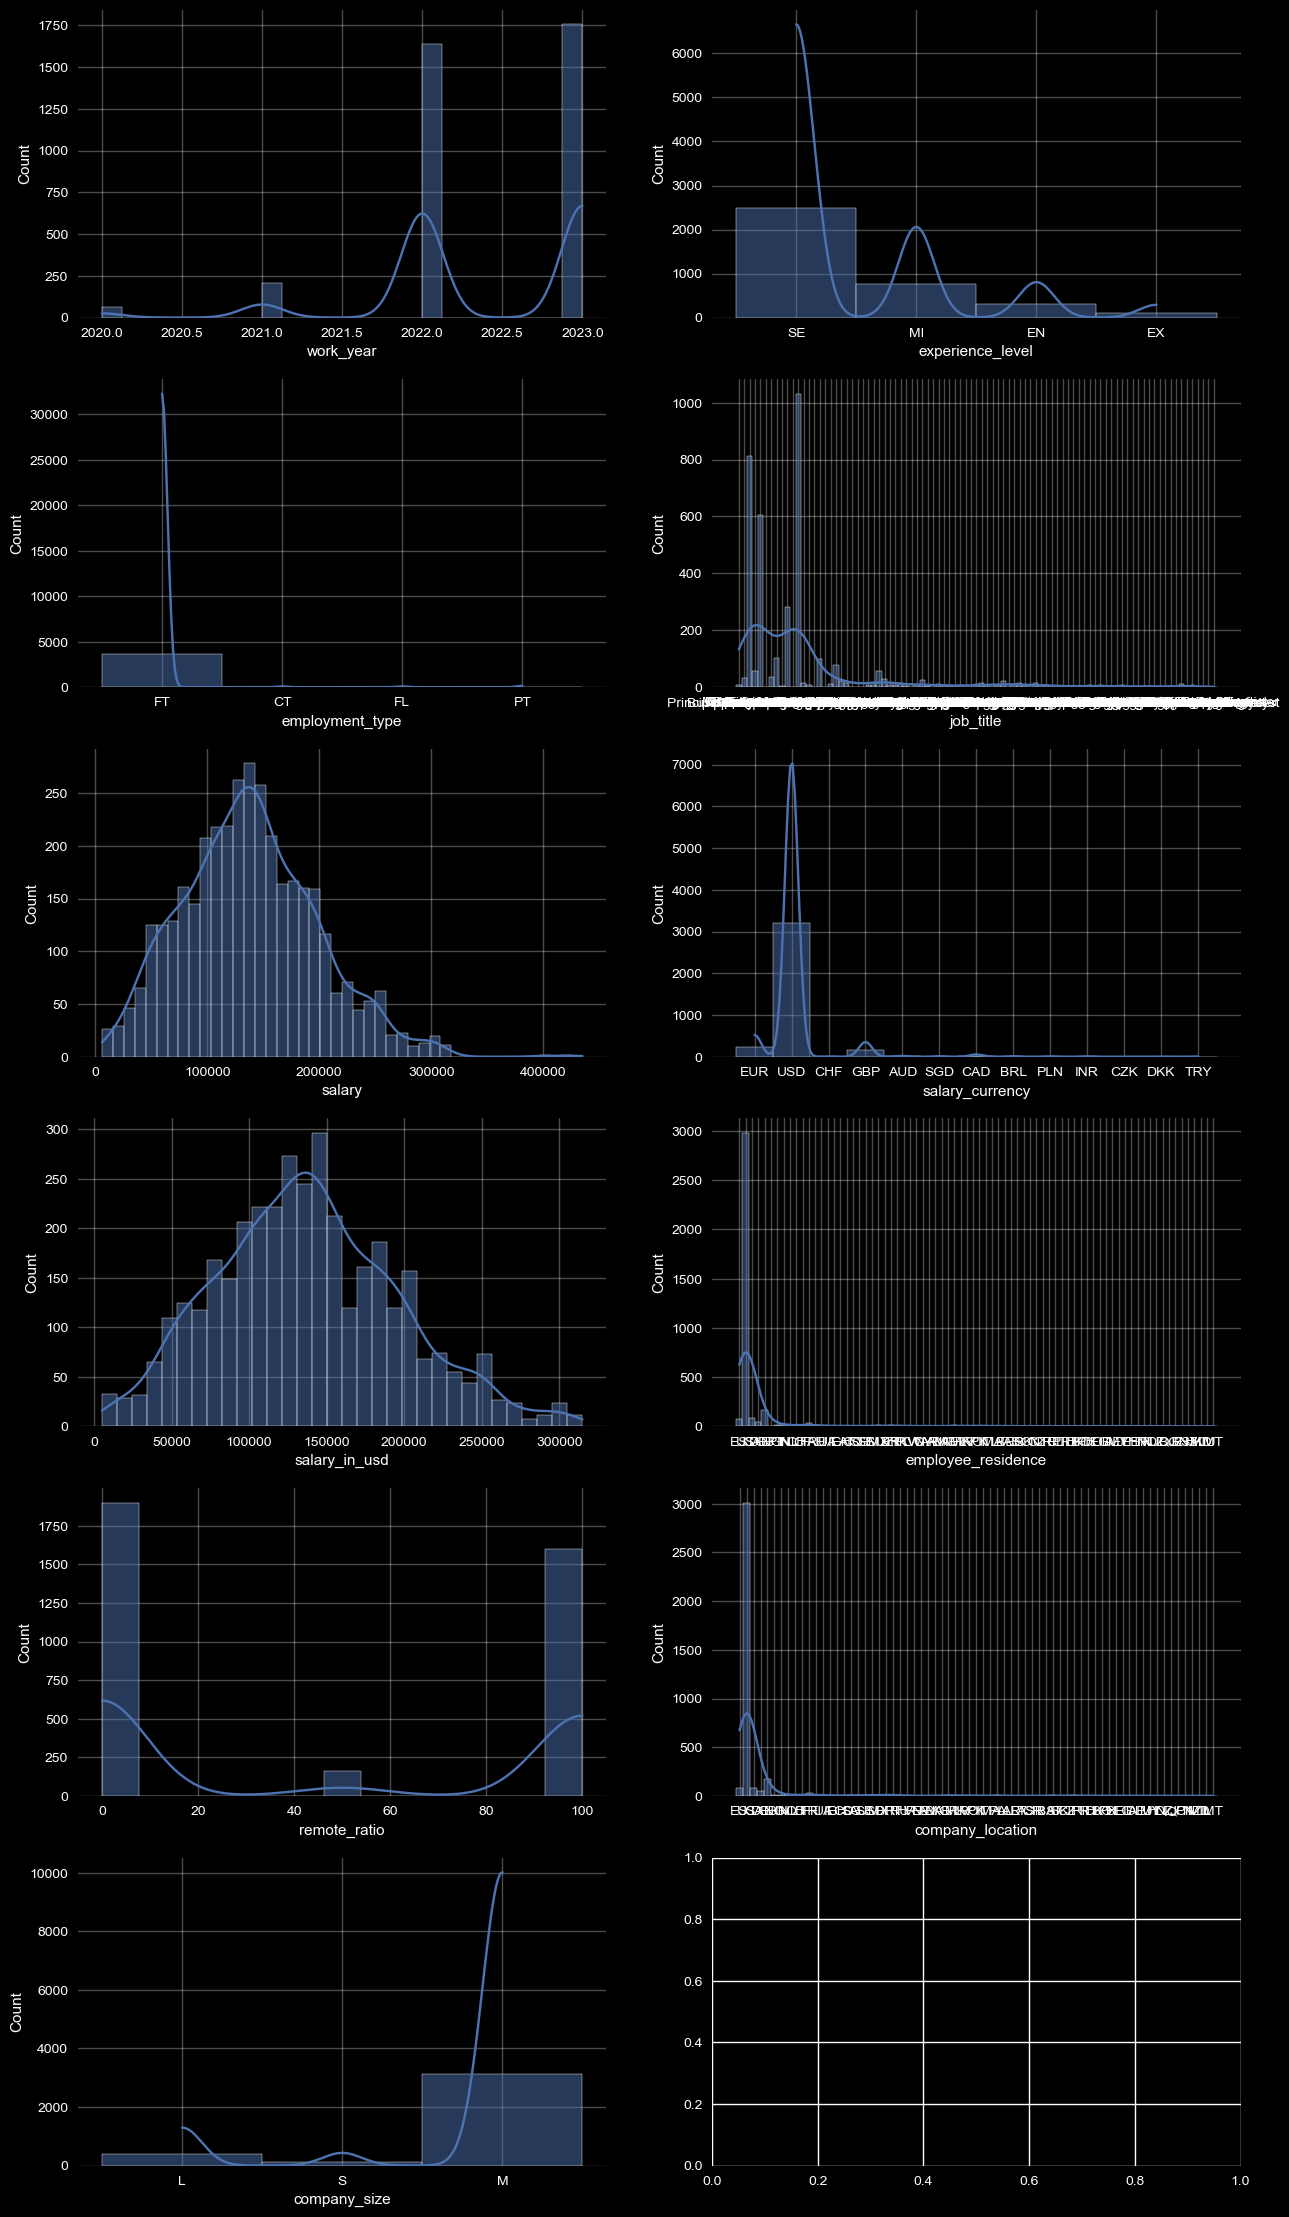

In [95]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (15, 28))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 6x2 subplot figure
fig, axs = plt.subplots(6, 2, figsize=(15, 28))

i = 1
# Loop through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(6, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
    plt.grid(alpha = 0.3)
    i += 1
    
# Show the plot
plt.show()

# 📈 Some columns by salary
---

### Distribution of Salary (USD) by Year

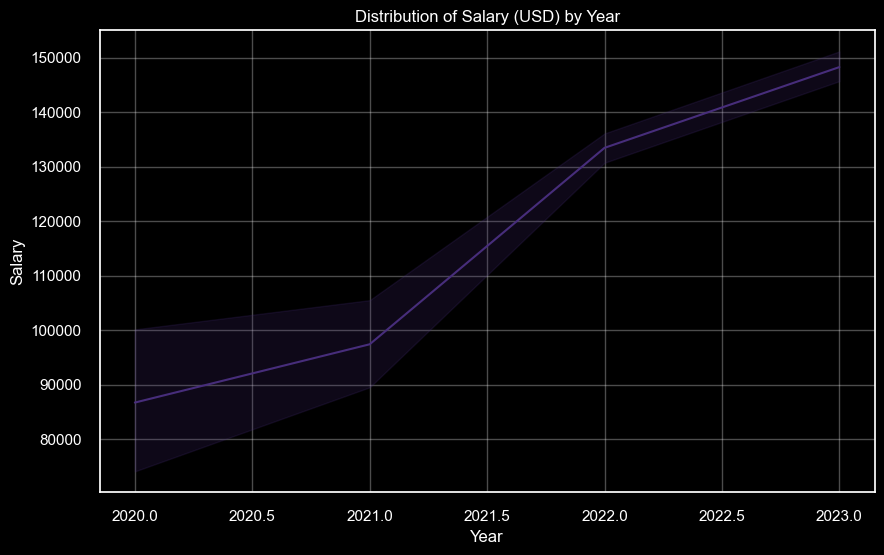

In [174]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create histogram
sns.lineplot(y = 'salary_in_usd', x = 'work_year', data = df, color = '#472d7b', alpha = 1)

# Customize the title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary (USD) by Year')
plt.xlabel('Year')
plt.ylabel('Salary')

# Display the plot
plt.show()

### Distribution of Salary (USD) by Experience

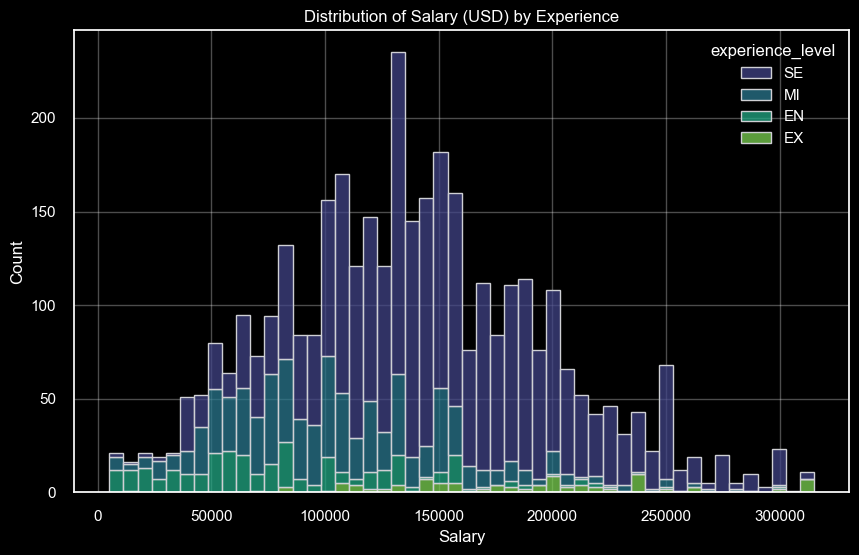

In [109]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create histogram
sns.histplot(x = 'salary_in_usd', hue = 'experience_level', multiple = 'stack',
             edgecolor = '#cfd0d4', bins = 50, data = df, palette = 'viridis')

# Customize the title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary (USD) by Experience')
plt.xlabel('Salary')
plt.ylabel('Count')

# Display the plot
plt.show()

### Distribution of Salary by Salary Currency

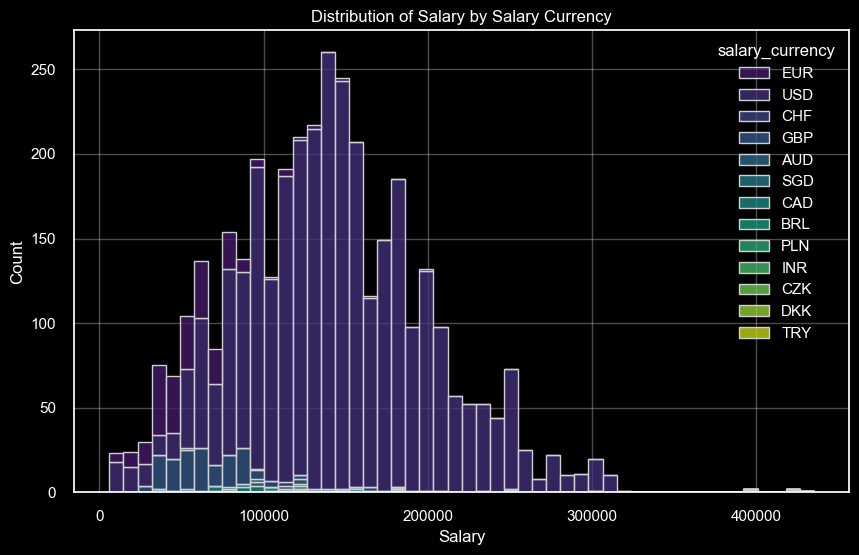

In [108]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create histogram
sns.histplot(x = 'salary', hue = 'salary_currency', multiple = 'stack', alpha = 0.9,
             edgecolor = '#cfd0d4', bins = 50, data = df, palette = 'viridis')

# Customize the title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary by Salary Currency')
plt.xlabel('Salary')
plt.ylabel('Count')

# Display the plot
plt.show()

### Distribution of Salary (USD) by Employee Residence (Top 3 Countries)

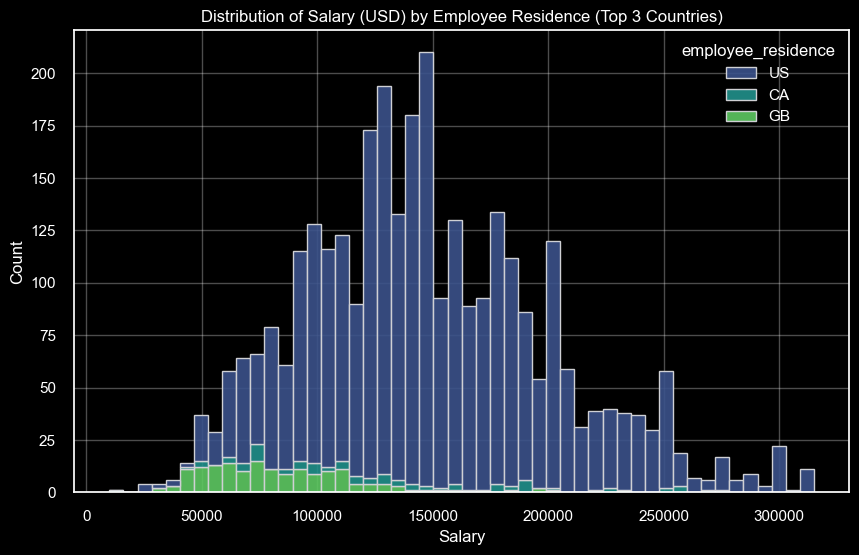

In [210]:
top_countries = df['employee_residence'].value_counts().nlargest(3).index.tolist()

# Filter the dataset with the 3 countries with the most occurrences
df_top_countries = df[df['employee_residence'].isin(top_countries)]

# Sets background style and figure size
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))



# Creates the histogram with the 3 countries with the most occurrences
sns.histplot(x = 'salary_in_usd', hue = 'employee_residence', multiple = 'stack', alpha = 0.9,
             edgecolor = '#cfd0d4', bins = 50, data = df_top_countries, palette = 'viridis')

# Customize axis title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary (USD) by Employee Residence (Top 3 Countries)')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.show()


### Distribution of Salary (USD) by Remote Ratio

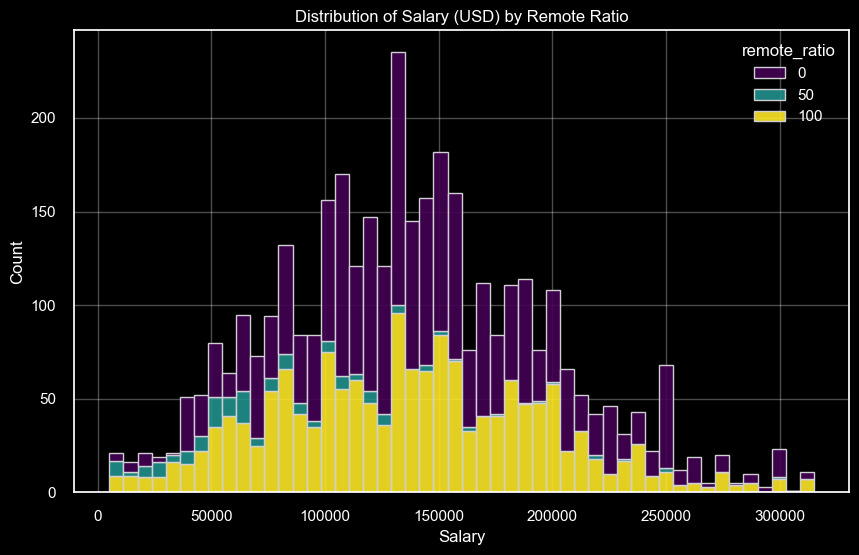

In [208]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create histogram
sns.histplot(x = 'salary_in_usd', hue = 'remote_ratio', multiple = 'stack', alpha = 0.9,
             edgecolor = '#cfd0d4', bins = 50, data = df, palette = 'viridis')

# Customize axis title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary (USD) by Remote Ratio')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.show()

### Distribution of Salary by Company Location

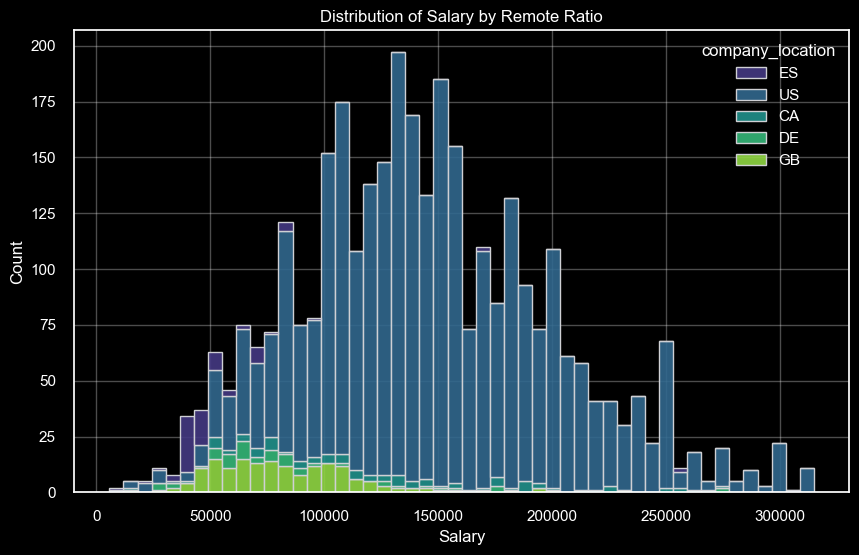

In [122]:
top_company = df['company_location'].value_counts().nlargest(5).index.tolist()

# Filter the dataset with the 5 Company Location with the most occurrences
df_top_company = df[df['company_location'].isin(top_company)]

# Sets background style and figure size
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Creates the histogram with the 5 Company Location with the most occurrences
sns.histplot(x = 'salary_in_usd', hue = 'company_location', multiple = 'stack', alpha = 0.9,
             edgecolor = '#cfd0d4', bins = 50, data = df_top_company, palette = 'viridis')

# Customize axis title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary by Company Location')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.show()

### Distribution of Salary (USD) by Company Size

Text(0, 0.5, 'Count')

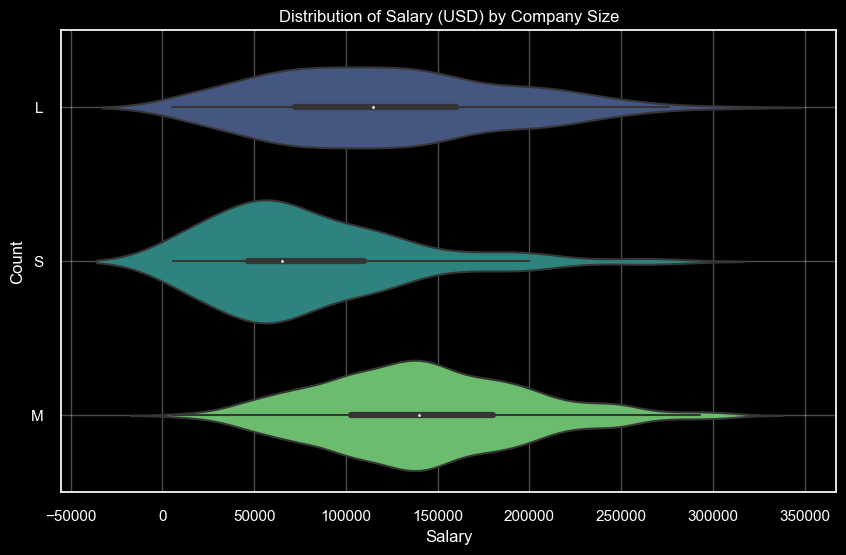

In [206]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create the Violin plot
sns.violinplot(x = 'salary_in_usd', y = 'company_size', data = df, palette = 'viridis')

# Customize axis title and labels
plt.grid(alpha = 0.3)
plt.title('Distribution of Salary (USD) by Company Size')
plt.xlabel('Salary')
plt.ylabel('Count')

---
# 🏁 The End! Feel free to criticize! 🏁
---